In [35]:
import json
from Blocks import Blocks
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [93]:
blocks = Blocks()

In [94]:
means = []
avg = []
block_vals = {}
all_block_time_diffs = {}

for local_block in blocks.local_blocks:
    block = blocks.getBlock(local_block)
    block_time = block['time']
    txs = block['tx']
    time_diffs = []
    for tx in txs[1:]:
        time_diffs.append((datetime.datetime.fromtimestamp(block_time) - 
                           datetime.datetime.fromtimestamp(tx['time'])).seconds)
    time_diffs = [i for i in time_diffs if i != 0]
    
    all_block_time_diffs[local_block] = time_diffs
    avg = np.mean(time_diffs)
    mean = np.median(time_diffs)
    block_vals[local_block] = [avg, mean]
        
    
    

In [132]:
def plot_avg(multi_block_avg=False):
    x = []
    y = []
    sorted_dict = {key: value for key,value in sorted(block_vals.items(), key=lambda item: item[0])}
    for key in sorted_dict.keys():
        x.append(int(key))
        y.append(block_vals[key][0])
    _ = plt.plot(x,y,color='blue', label='Durchschnitt')
    _ = plt.scatter(x,y,color='red')
    _ = plt.legend(loc='upper left')
    _ = plt.title("Durchschnittliche Zeit einer Transaktion vom Posten bis in den Block")
    _ = plt.xlabel('Blöcke')
    _ = plt.ylabel('Durchschnittliche Zeit')
    if multi_block_avg:
        _ = plt.plot([min(x), max(x)], [np.average(y), np.average(y)], '--', color='grey')
        print(f"Durchschnitt: {np.average(y)} Sekunden = {np.average(y)/60} Minuten")
        

In [133]:
def plot_median(multi_block_median=False):
    x = []
    y = []
    sorted_dict = {key: value for key,value in sorted(block_vals.items(), key=lambda item: item[0])}
    for key in sorted_dict.keys():
        x.append(int(key))
        y.append(block_vals[key][1])
    _ = plt.plot(x,y,color='green', label='Median')
    _ = plt.scatter(x,y,color='red')
    _ = plt.legend(loc='upper left')
    _ = plt.title("Median der Zeit für eine Transaktion vom Posten bis in den Block")
    _ = plt.xlabel('Blöcke')
    _ = plt.ylabel('Median')
    if multi_block_median:
        _ = plt.plot([min(x), max(x)], [np.median(y), np.median(y)], '--', color='grey')
        print(f"Median: {np.median(y)} Sekunden = {np.median(y)/60} Minuten")
        

669904


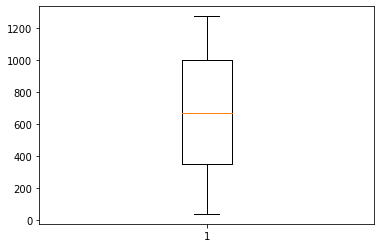

In [134]:
print(blocks.local_blocks[0])
_ = plt.boxplot(all_block_time_diffs[blocks.local_blocks[0]], showfliers=False)

Durchschnitt: 1515.7944839239797 Sekunden = 25.263241398732994 Minuten


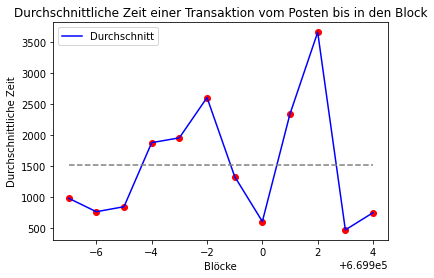

In [135]:
plot_avg(True)

Median: 637.0 Sekunden = 10.616666666666667 Minuten


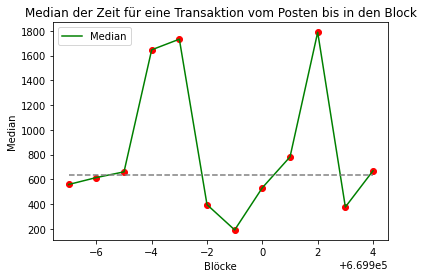

In [136]:
plot_median(True)